<a href="https://colab.research.google.com/github/Yash-1024/Data-Science/blob/main/Unemployment_analysis/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import folium
from folium import Circle
from geopy import Nominatim

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [4]:
df =pd.read_csv("/content/Unemployment in India.csv")

In [5]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df.sample(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
516,Jammu & Kashmir,29-02-2020,Monthly,19.86,1060116.0,41.23,Urban
96,Haryana,31-07-2019,Monthly,16.22,4826560.0,42.17,Rural
661,Sikkim,31-08-2019,Monthly,4.82,90850.0,46.63,Urban
454,Delhi,30-06-2020,Monthly,18.11,4306807.0,34.32,Urban
83,Gujarat,31-08-2019,Monthly,3.70,13507342.0,50.57,Rural
38,Bihar,31-05-2020,Monthly,47.26,14050319.0,38.50,Rural
672,Tamil Nadu,31-07-2019,Monthly,3.18,12054414.0,38.89,Urban
198,Maharashtra,29-02-2020,Monthly,4.24,25293535.0,49.36,Rural
496,Himachal Pradesh,30-06-2019,Monthly,21.43,237576.0,49.58,Urban
416,Chandigarh,30-06-2019,Monthly,12.40,337145.0,40.44,Urban


In [8]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [9]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


from matplotlib import pyplot as plt
_df_0[' Estimated Unemployment Rate (%)'].plot(kind='hist', bins=20, title=' Estimated Unemployment Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[' Estimated Employed'].plot(kind='hist', bins=20, title=' Estimated Employed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[' Estimated Labour Participation Rate (%)'].plot(kind='hist', bins=20, title=' Estimated Labour Participation Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x=' Estimated Unemployment Rate (%)', y=' Estimated Employed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=' Estimated Employed', y=' Estimated Labour Participation Rate (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5[' Estimated Unemployment Rate (%)'].plot(kind='line', figsize=(8, 4), title=' Estimated Unemployment Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6[' Estimated Employed'].plot(kind='line', figsize=(8, 4), title=' Estimated Employed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7[' Estimated Labour Participation Rate (%)'].plot(kind='line', figsize=(8, 4), title=' Estimated Labour Participation Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df[df.duplicated()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area


In [13]:
df.isnull().sum().sum()

7

In [14]:
df.isnull().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

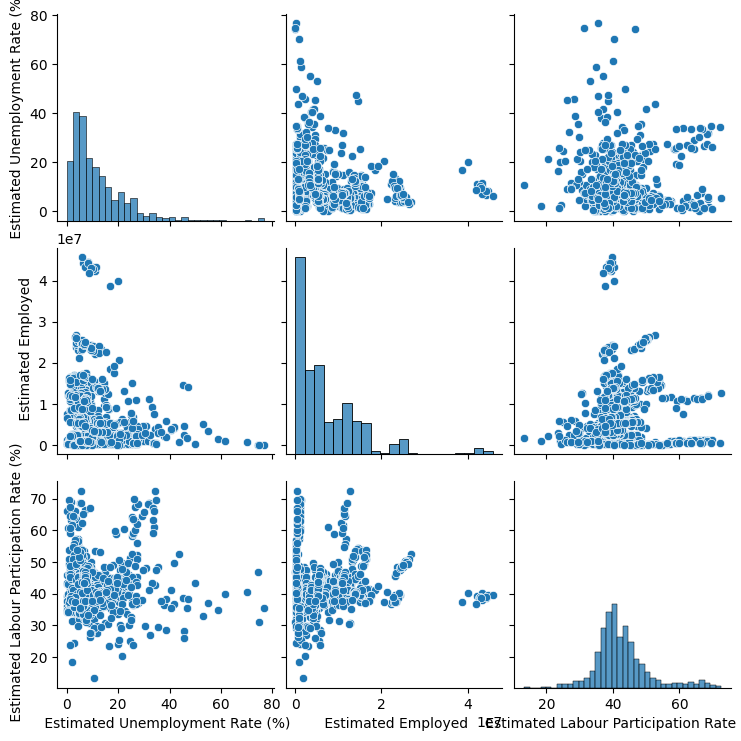

In [15]:
sns.pairplot(df)

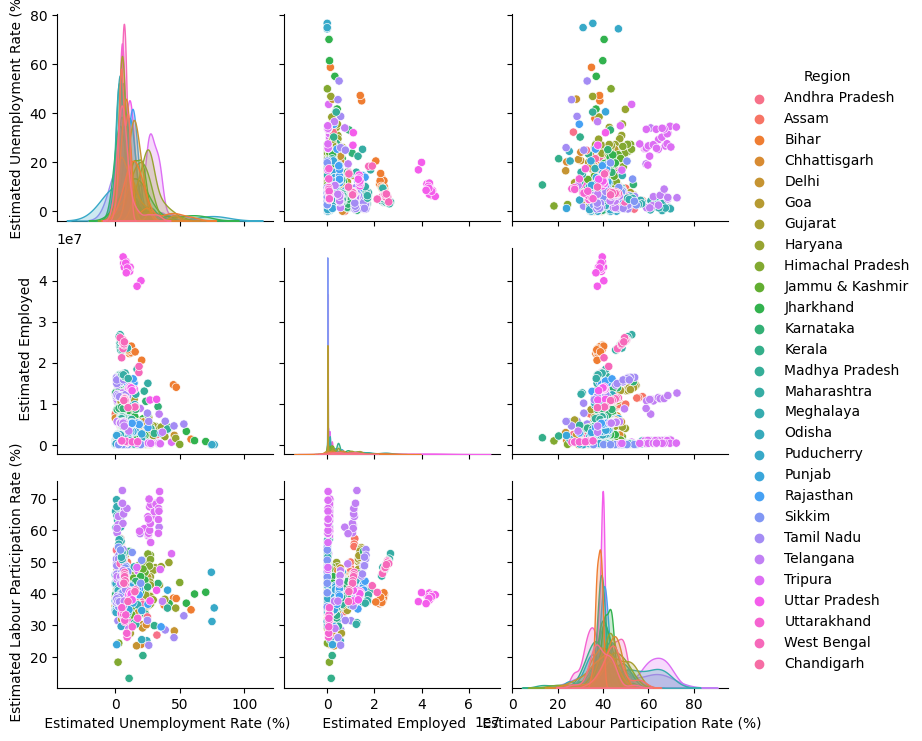

In [16]:
sns.pairplot(data = df, hue = 'Region')

In [17]:
df.Region.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

<Axes: >

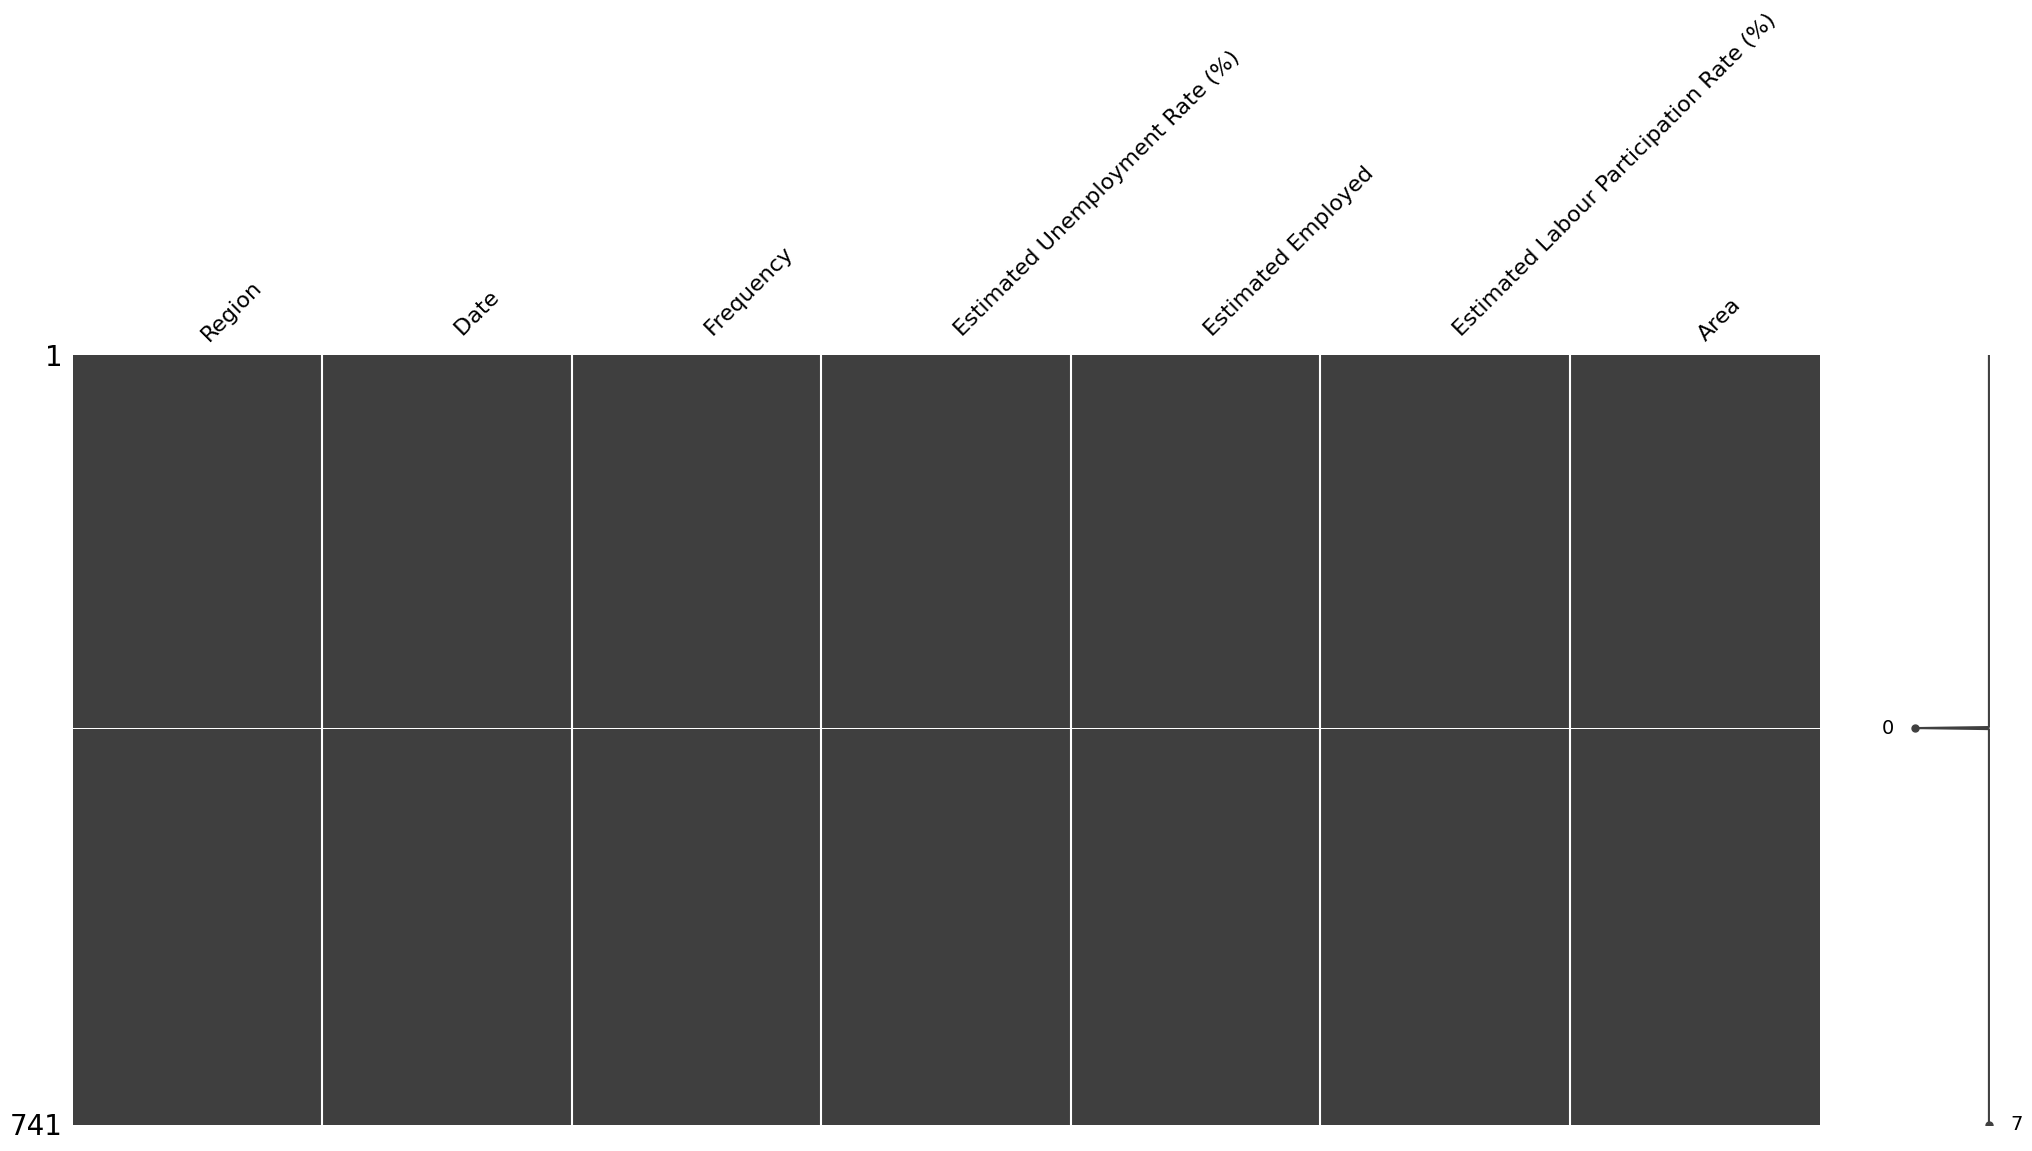

In [18]:
import missingno as msno
msno.matrix(df)

<Axes: ylabel='Area'>

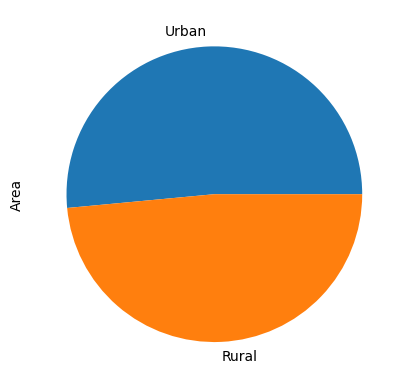

In [19]:
df['Area'].value_counts().plot.pie()

<Axes: ylabel='Region'>

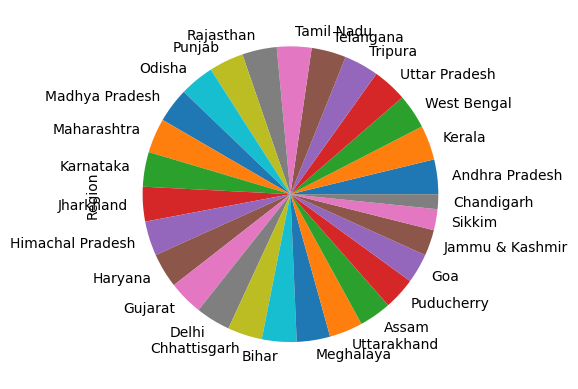

In [20]:
df['Region'].value_counts().plot.pie()

<Axes: >

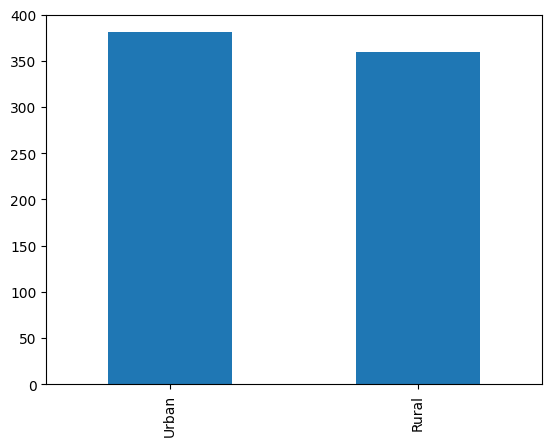

In [21]:
df['Area'].value_counts().plot.bar()